# Load Datasets and required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for association
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#for splitting the data
from sklearn.model_selection import train_test_split

#for normalization
from sklearn.preprocessing import MinMaxScaler

#for models
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [2]:
#reading the dataset
dataset = pd.read_csv('train.csv')

# Basic Dataset Statistics

In [3]:
#checking the shape of the dataset
dataset.shape

(54808, 14)

In [4]:
dataset.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
#description of the numerical attributes
dataset.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


Conclusion from Statistical Numerical Data:
The distribution of data for features no_of_trainings, age, length_of_service, avg_training_score looks normal because it's clear that the mean and the median are close enough

In [6]:
#description of the categorical attributes
dataset.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


Conclusion:

Data majority in gender is male with frequency 38496 

Data majority in department is Sales & Marketing with frequency 16840

Data majority in education is Bachelor's with frequency 36669

Data majority in region is region_2 with frequency 12343

Data majority in recruitment_channel is other with frequency 30446

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


# Checking for Null values

In [8]:
#checking for null values in the dataset
dataset.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Columns 'education' and 'previous_year_rating' have some null values

This needs to be solved

Solution:

Fill the education column using mode()

Fill the prev_year_rating with the median value (= 3)

In [9]:
#filling the null values
dataset['education'].fillna(dataset['education'].mode()[0], inplace = True)
dataset['previous_year_rating'].fillna(3, inplace = True)

#checking for null values again:
dataset.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

# Checking for Columns with one value only

In [10]:
#check for columns with only one value
one_val = dict()
for col in dataset.columns:
    if len(dataset[col].unique()) == 1:
        one_val.update({col: dataset[col].unique().tolist()})
        
print('The name of column(s) with single value: %s' % one_val)

The name of column(s) with single value: {}


No columns that have one value only, so nothing to be done

# Checking fro duplicate rows

In [11]:
dataset.duplicated().sum()

0

No duplicate rows, so nothing to be done

# dropping the 'employee_id'

In [12]:
dataset = dataset.drop(['employee_id'], axis = 1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             54808 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


# Data Visualization

### Uni-Variate

d:\DOWNLOADS\anaconda\anacond\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
d:\DOWNLOADS\anaconda\anacond\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


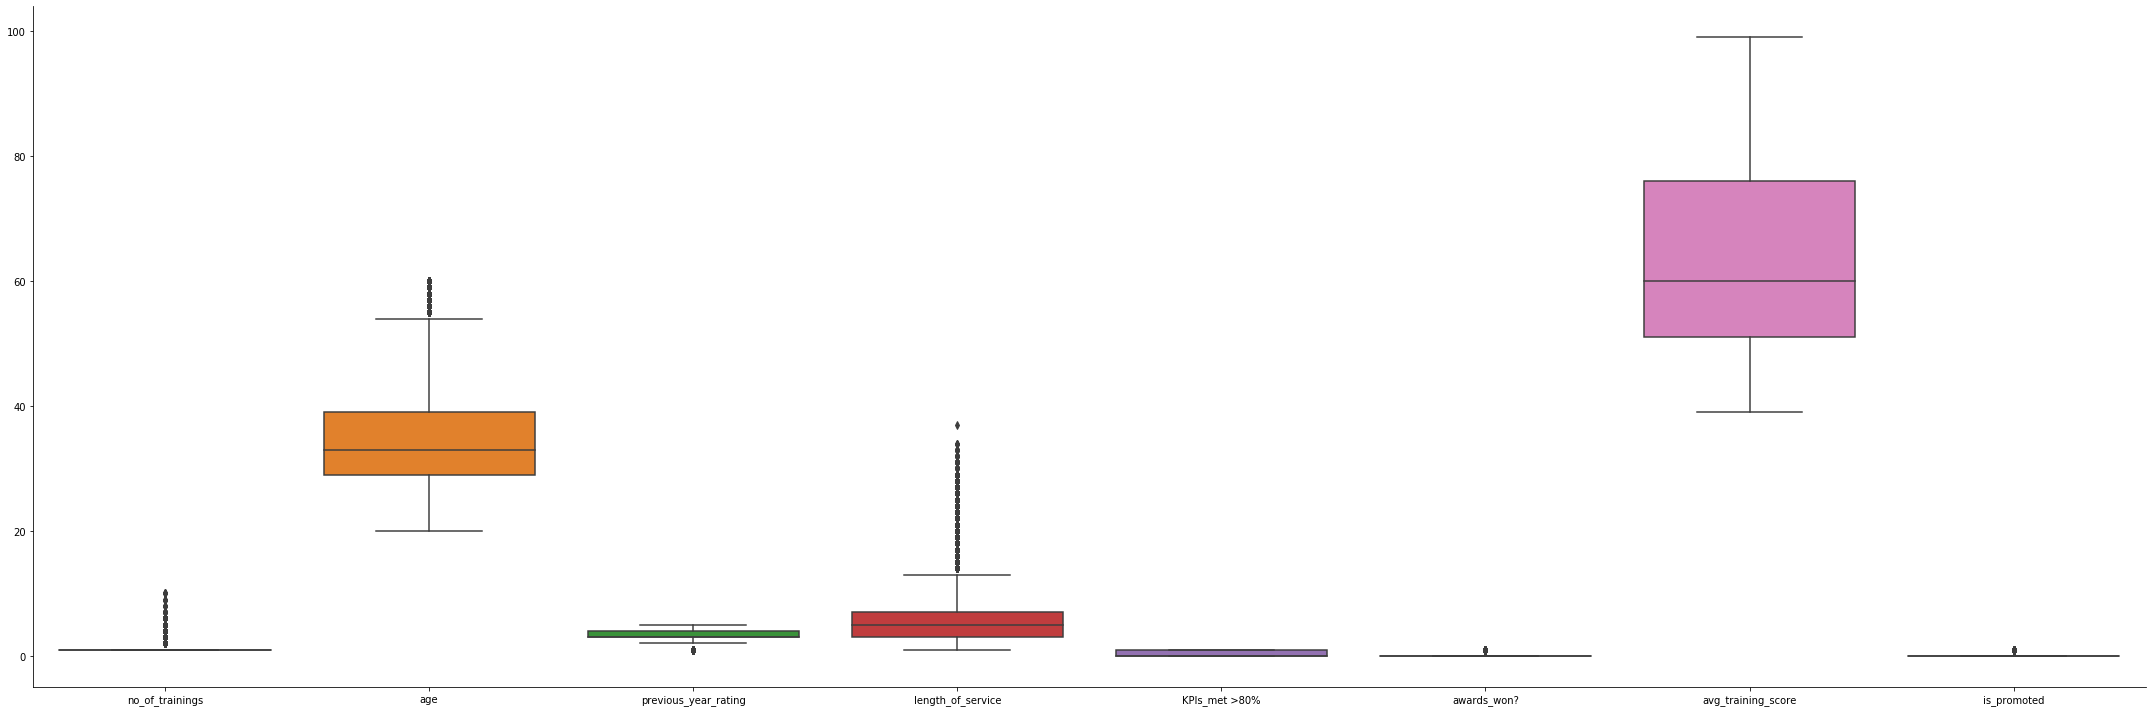

In [13]:
#first we try the boxplot
###################UNSUCCESSFUL TRIAL###########################
sns.factorplot(data=dataset,kind='box',size=10,aspect=3)

Features have pretty different scales, so, plotting a boxplot is not a good idea.

Instead what we can do is plot histograms of various continuously distributed features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208EB19E208>,
      dtype=object)

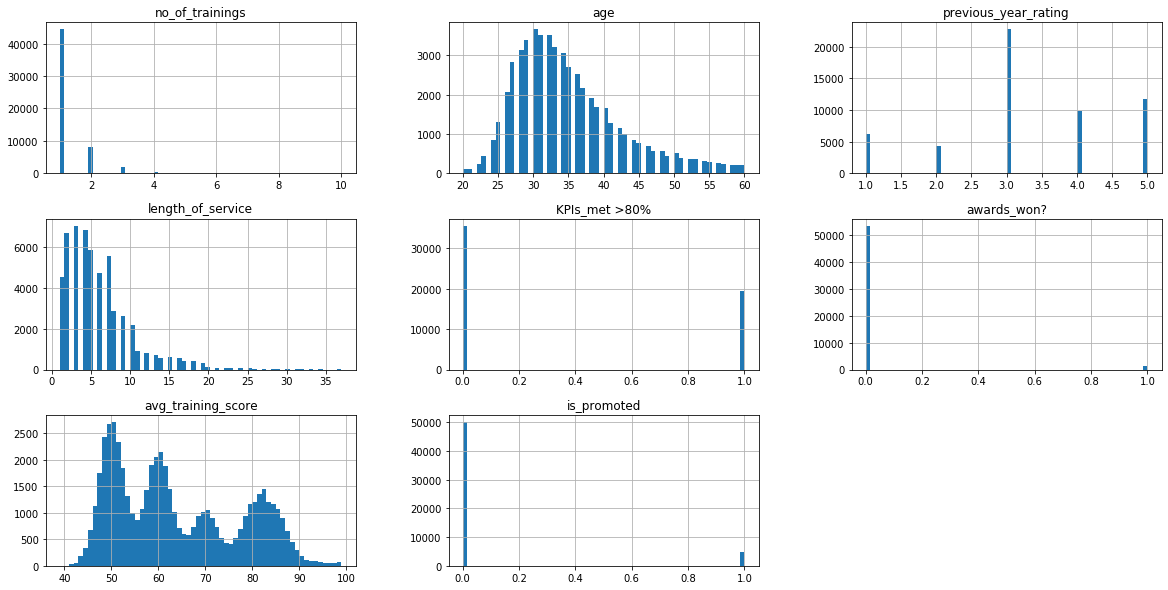

In [14]:
#plotting the histogram distribution of each numerical feature
dataset.hist(bins=60,figsize=(20,10))

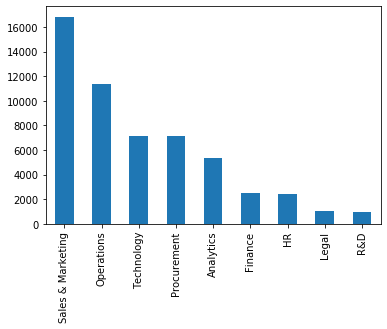

In [15]:
dataset['department'].value_counts().plot(kind='bar')

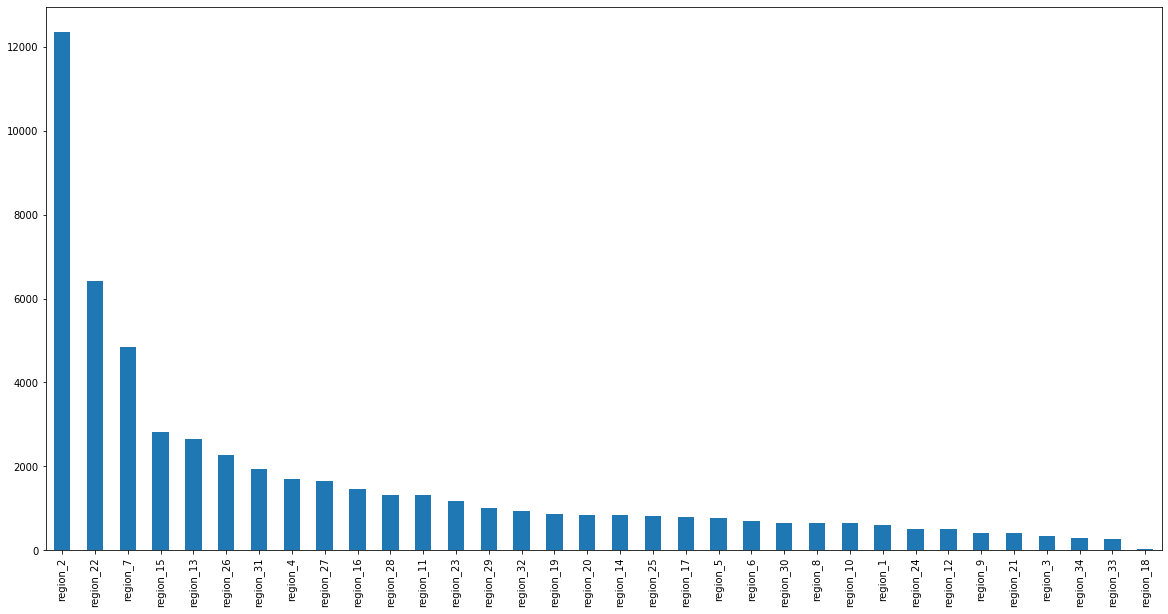

In [16]:
dataset['region'].value_counts().plot(kind='bar', figsize=(20,10))

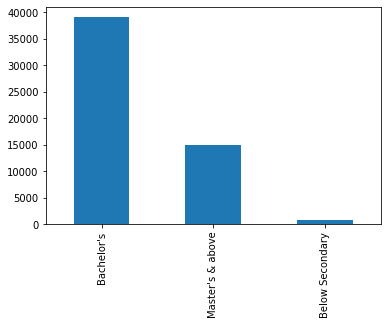

In [17]:
dataset['education'].value_counts().plot(kind='bar')

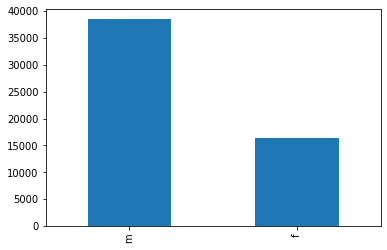

In [18]:
dataset['gender'].value_counts().plot(kind='bar')

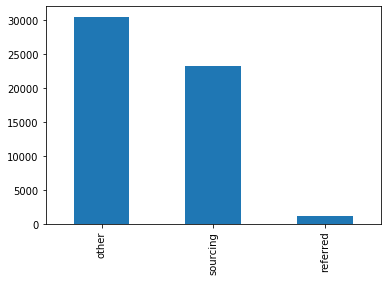

In [19]:
dataset['recruitment_channel'].value_counts().plot(kind='bar')

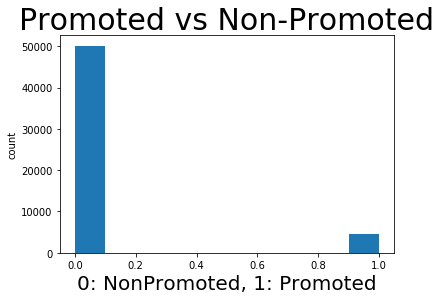

In [20]:
plt.hist(dataset['is_promoted'])
plt.title('Promoted vs Non-Promoted', fontsize = 30)
plt.xlabel('0: NonPromoted, 1: Promoted', fontsize = 20)
plt.ylabel('count')
plt.show()

There is a clear imbalancing problem in the target column between the two classes

Need to be solved using SMOTE in the preprocessing step

### Multi-Variate

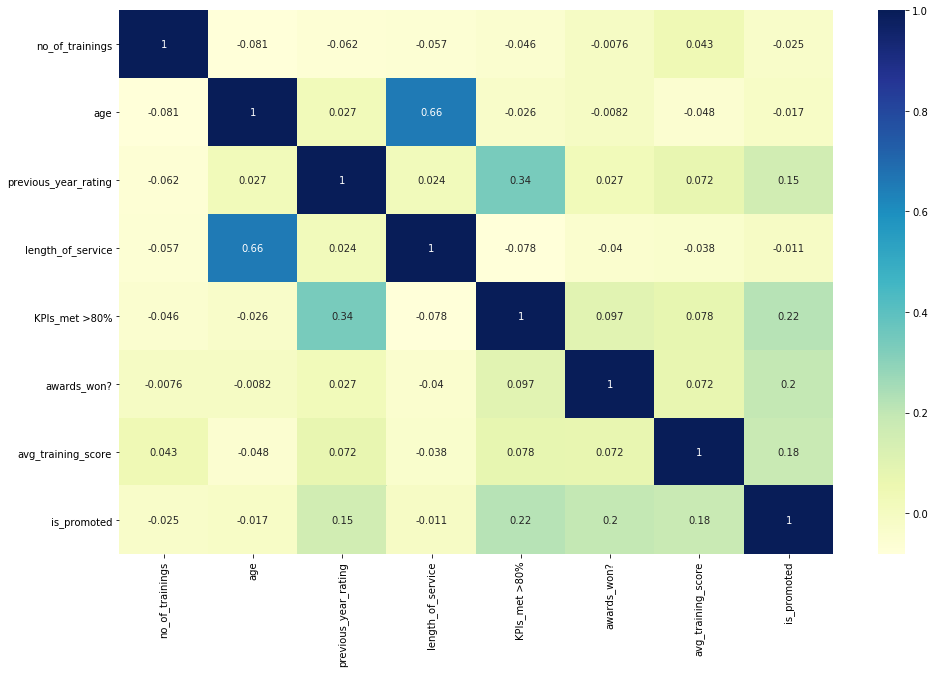

In [21]:
plt.figure(figsize = (16, 10))
sns.heatmap(dataset.corr(), annot = True, cmap="YlGnBu")
plt.show()

- Each variable has correlation = 1 with itself as expected

- There is high correlation between age and length_of_service as expected as older employees are more likely to have been
working in the company for longer time

- KPIs_met>80% is somehow related to previous year rating as expected as high rated employees are more likely to have their
KPIs met the condition

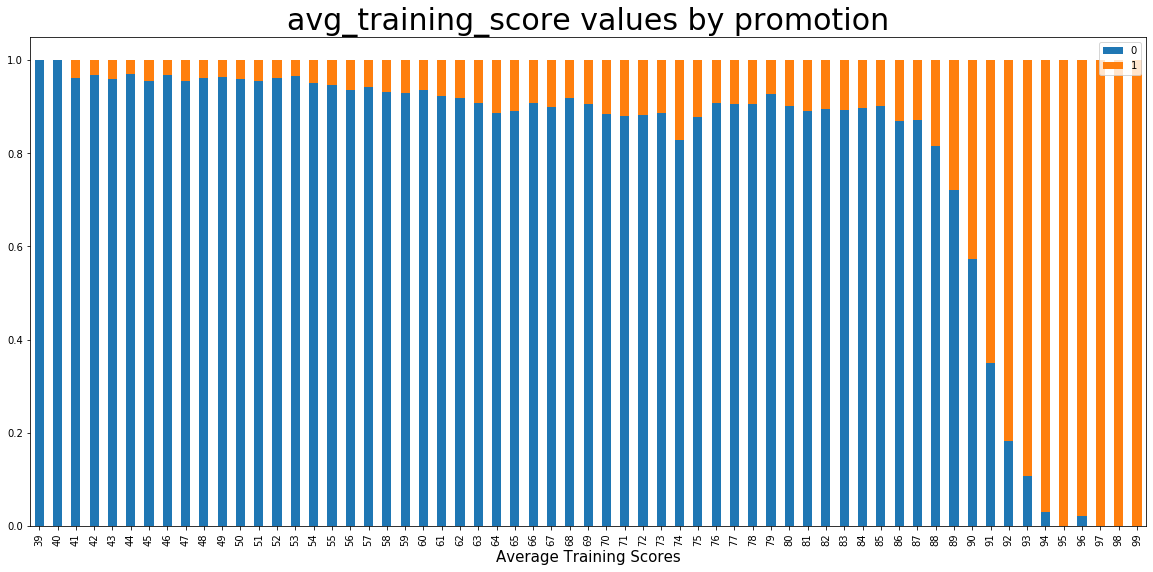

In [22]:
data = pd.crosstab(dataset['avg_training_score'], dataset['is_promoted'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 9))

plt.title('avg_training_score values by promotion', fontsize = 30)
plt.xlabel('Average Training Scores', fontsize = 15)
plt.legend()
plt.show()

It's clear that the higher the avg_training_score, the more likely the employee is to be promoted

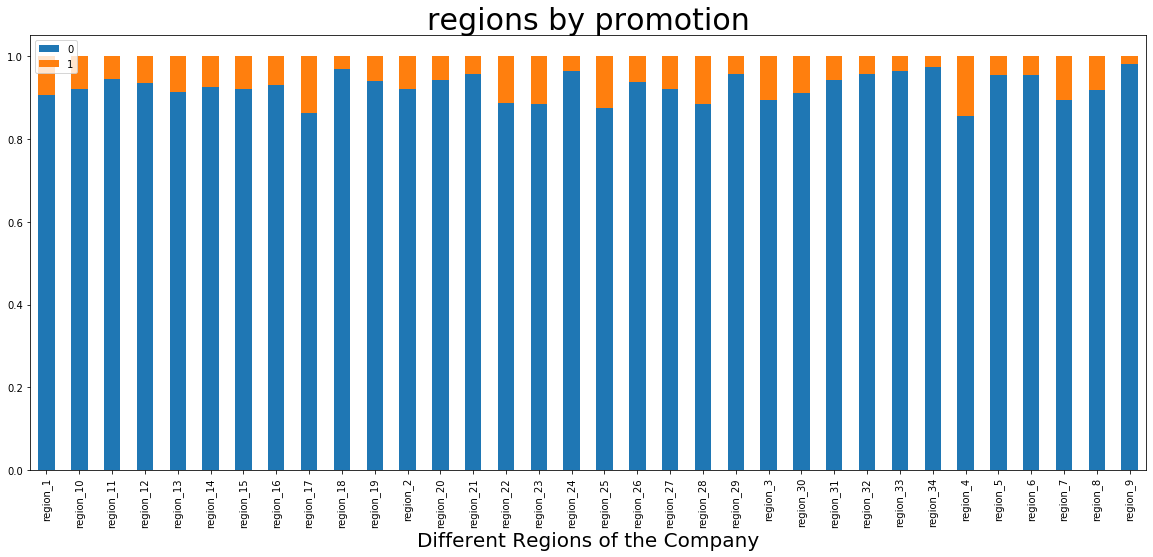

In [23]:
data = pd.crosstab(dataset['region'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8))

plt.title('regions by promotion', fontsize = 30)
plt.xlabel('Different Regions of the Company', fontsize = 20)
plt.legend()
plt.show()

The above graph shows that there is no biasedness over regions in terms of Promotion as all the regions share promotions almost equally

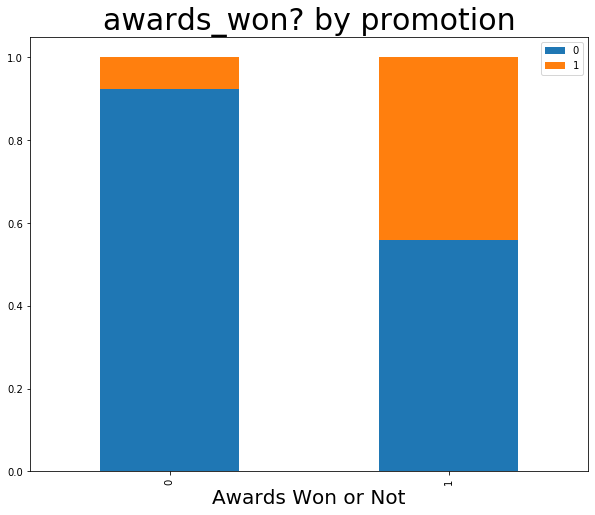

In [24]:
data = pd.crosstab(dataset['awards_won?'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8))

plt.title('awards_won? by promotion', fontsize = 30)
plt.xlabel('Awards Won or Not', fontsize = 20)
plt.legend()
plt.show()

It's clear that the more awards the employee have, the more likely he/she is to be promoted

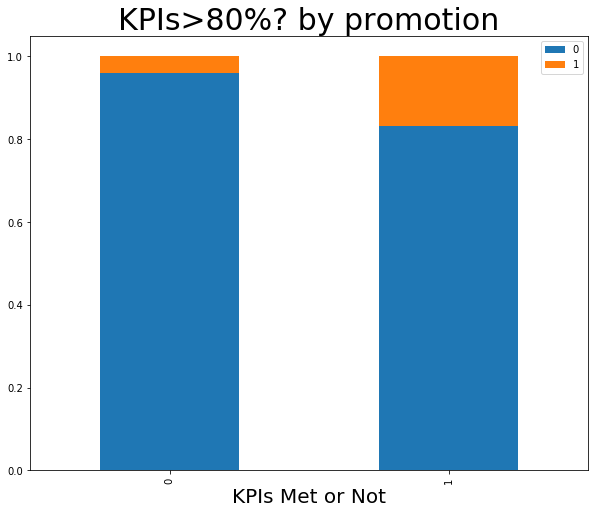

In [25]:
data = pd.crosstab(dataset['KPIs_met >80%'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8))

plt.title('KPIs>80%? by promotion', fontsize = 30)
plt.xlabel('KPIs Met or Not', fontsize = 20)
plt.legend()
plt.show()

It's clear that the more KPIs the employee have, the more likely he/she is to be promoted

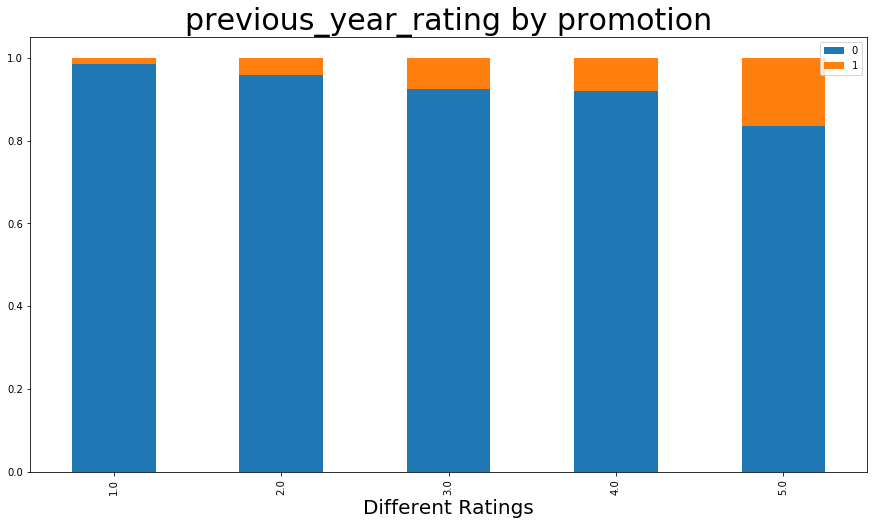

In [26]:
data = pd.crosstab(dataset['previous_year_rating'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 8))

plt.title('previous_year_rating by promotion', fontsize = 30)
plt.xlabel('Different Ratings', fontsize = 20)
plt.legend()
plt.show()

It's clear that the higher the rating of the employee, the more likely he/she is to be promoted

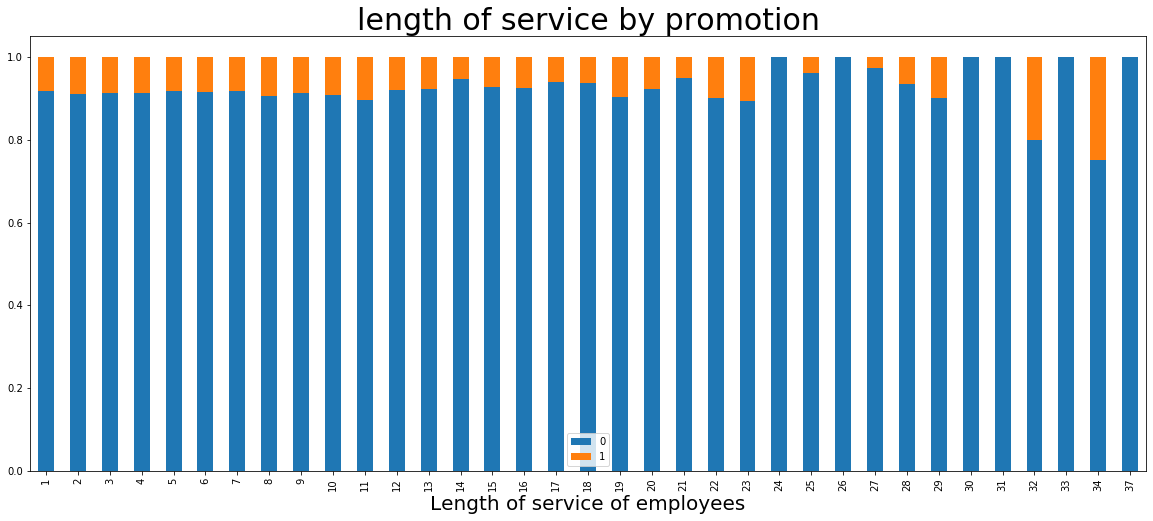

In [27]:
data = pd.crosstab(dataset['length_of_service'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8))

plt.title('length of service by promotion', fontsize = 30)
plt.xlabel('Length of service of employees', fontsize = 20)
plt.legend()
plt.show()

Overall, we don't see a pttern in the length of service to determine the promotion of the employee


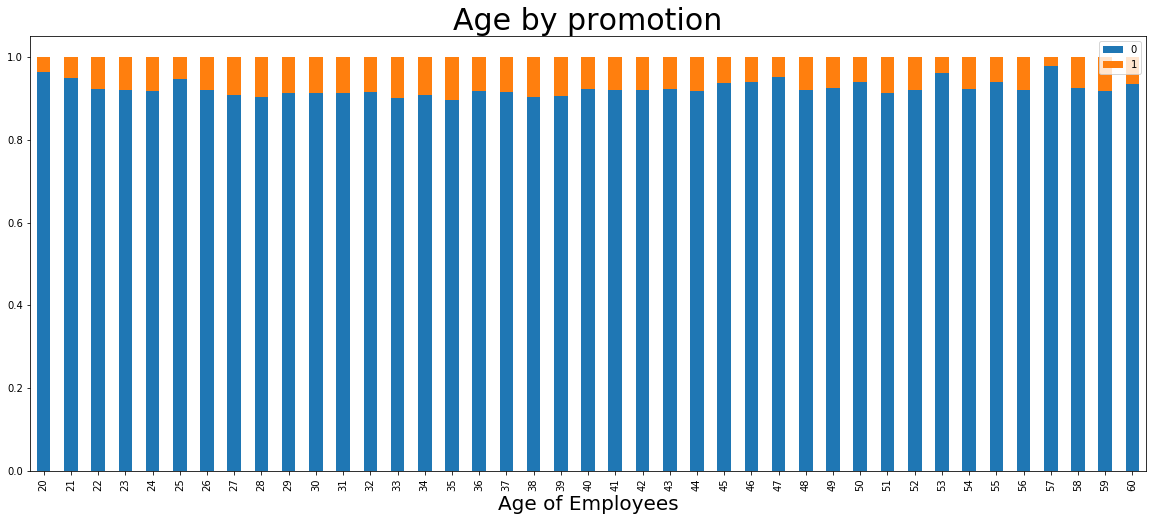

In [28]:
data = pd.crosstab(dataset['age'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8))

plt.title('Age by promotion', fontsize = 30)
plt.xlabel('Age of Employees', fontsize = 20)
plt.legend()
plt.show()

Overall, i don't see a pttern in the age to determine the promotion of the employee.

And this shows that the company promotes employees of all ages equally, even the freshers have equal share of promotion


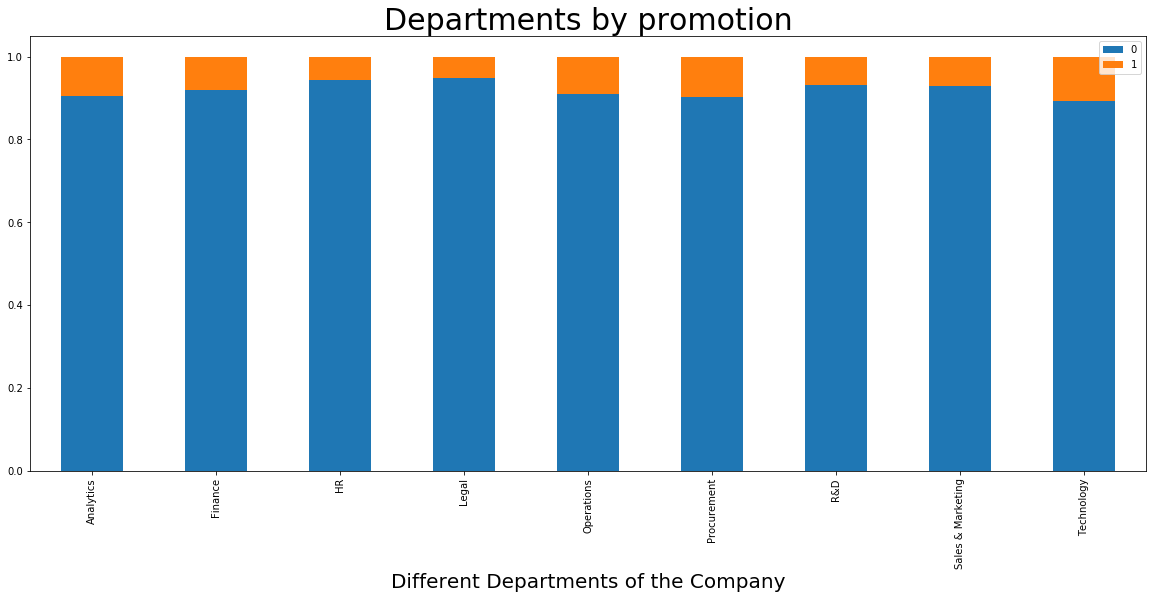

In [29]:
data = pd.crosstab(dataset['department'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8))

plt.title('Departments by promotion', fontsize = 30)
plt.xlabel('Different Departments of the Company', fontsize = 20)
plt.legend()
plt.show()

It's clear that the department has no pattern to determine the promotion of the employee, 
so, we can safely say that Departments have a similar effect on the promotion.

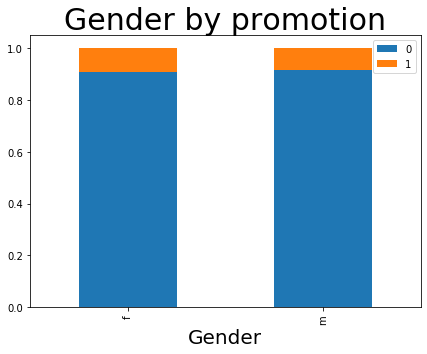

In [30]:
data = pd.crosstab(dataset['gender'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7, 5))

plt.title('Gender by promotion', fontsize = 30)
plt.xlabel('Gender', fontsize = 20)
plt.legend()
plt.show()

- The gender doesn't affect how likely the employee is to be promoted
- Yes females are minority in the company, but When it comes to promotion, they are competing with their men counterparts neck-to-neck.

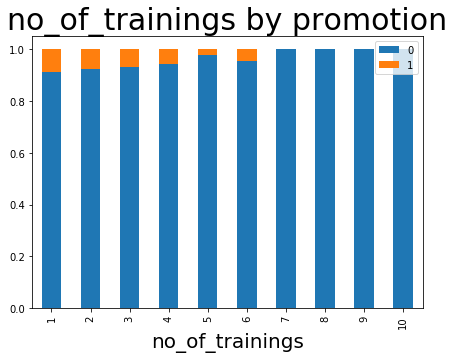

In [31]:
data = pd.crosstab(dataset['no_of_trainings'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7, 5))

plt.title('no_of_trainings by promotion', fontsize = 30)
plt.xlabel('no_of_trainings', fontsize = 20)
plt.legend()
plt.show()

It's clear that the less trainings the employee have, the more likely he/she is to be promoted

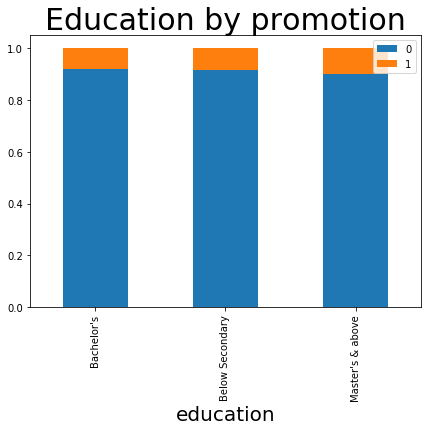

In [32]:
data = pd.crosstab(dataset['education'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7, 5))

plt.title('Education by promotion', fontsize = 30)
plt.xlabel('education', fontsize = 20)
plt.legend()
plt.show()

It's clear that Education doesn't affect how likely the employee is to be promoted

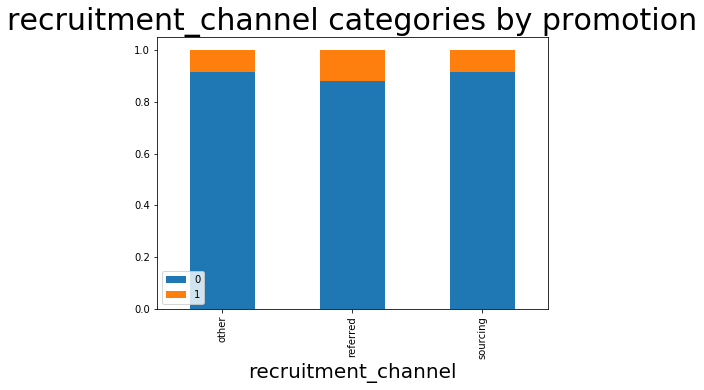

In [33]:
data = pd.crosstab(dataset['recruitment_channel'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7, 5))

plt.title('recruitment_channel categories by promotion', fontsize = 30)
plt.xlabel('recruitment_channel', fontsize = 20)
plt.legend()
plt.show()

It's clear that recruitment_channel doesn't affect how likely the employee is to be promoted

# Descriptive Analysis: Association Rule Mining

Done in another notebook to minimize the length of this one

# Feature Selection

# From the insights extracted from the data visualization and descriptive analysis we will only train on the following features:
- avg_training_score
- awards_won?
- KPIs>80%?
- previous_year_rating
- no_of_trainingd

# Preprocessing

### Handling Categorical data

In [34]:
#split data into features and target
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

print(X.shape)
print(y.shape)

(54808, 12)
(54808,)


In [35]:
#performing one hot encoding on the categorical variables
X = pd.get_dummies(X)
X.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'reg

### Handling Imbalanced class

In [36]:
from imblearn.over_sampling import SMOTE

X, y = SMOTE().fit_resample(X, y.values.ravel())

X = pd.DataFrame(X)
y = pd.DataFrame(y)

print( X.shape)
print( y.shape)

(100280, 58)
(100280, 1)


In [37]:
y[0].value_counts()
#Now the problem of imbalancing is solved

0    50140
1    50140
Name: 0, dtype: int64

### Splitting the data set into train_validate and test

In [38]:
#concatenate X and Y
dataset_v2 = pd.concat([X,y], axis=1)
dataset_v2.head(2)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,0
0,1,35,5.0,8,1,0,49,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1,1,30,5.0,4,0,0,60,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [48]:
dataset_v2.rename(columns = {0:'is_promoted'}, inplace = True)


In [49]:
dataset_v2.head(2)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,is_promoted
0,1,35,5.0,8,1,0,49,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1,1,30,5.0,4,0,0,60,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [50]:
dataset_train, dataset_test = train_test_split(dataset_v2, test_size = 0.2, random_state = 0)

### Data Normalization

In [51]:
#of the train data
for column in dataset_train.columns:
    dataset_train[column] = (dataset_train[column] - dataset_train[column].min()) / (dataset_train[column].max() - dataset_train[column].min())    

In [52]:
#of the test data
for column in dataset_test.columns:
    dataset_test[column] = (dataset_test[column] - dataset_test[column].min()) / (dataset_test[column].max() - dataset_test[column].min())    

### Splitting the train into train and validate

In [53]:
dataset_train_v2, dataset_validation = train_test_split(dataset_train, test_size = 0.2, random_state = 0)

### preparing the features and the target


In [54]:
X_train = dataset_train_v2.drop(['is_promoted'],axis=1)
y_train = dataset_train_v2['is_promoted']

X_train.head(2)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
80653,0.0,0.225,1.000000,0.083333,0.0,0.0,0.816667,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
63614,0.0,0.500,0.661904,0.166667,1.0,0.0,0.183333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [55]:
X_valid = dataset_validation.drop(['is_promoted'],axis=1)
y_valid = dataset_validation['is_promoted']

X_valid.head(2)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
85789,0.0,0.250,0.5,0.027778,1.0,0.0,0.166667,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
29791,0.0,0.375,0.5,0.250000,0.0,0.0,0.133333,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [56]:
X_test = dataset_test.drop(['is_promoted'],axis=1)
y_test = dataset_test['is_promoted']

X_test.head(2)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
92988,0.0,0.2,1.00000,0.030303,1.0,0.0,0.779661,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
77138,0.0,0.6,0.79813,0.181818,1.0,0.0,0.355932,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# Training Models

## SVM

In [57]:
SVM = SVC().fit(X_train, y_train)
y_pred_svm = SVM.predict(X_valid)

#evaluating 
print(confusion_matrix(y_valid, y_pred_svm))
print(classification_report(y_valid, y_pred_svm))
print(accuracy_score(y_valid, y_pred_svm))

[[8019   27]
 [ 854 7145]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      8046
         1.0       1.00      0.89      0.94      7999

    accuracy                           0.95     16045
   macro avg       0.95      0.94      0.94     16045
weighted avg       0.95      0.95      0.94     16045

0.9450919289498286


## KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_pred_knn = KNN.predict(X_valid)

#evaluating 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_valid, y_pred_knn))
print(classification_report(y_valid, y_pred_knn))
print(accuracy_score(y_valid, y_pred_knn))

[[7498  548]
 [ 589 7410]]
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      8046
         1.0       0.93      0.93      0.93      7999

    accuracy                           0.93     16045
   macro avg       0.93      0.93      0.93     16045
weighted avg       0.93      0.93      0.93     16045

0.9291368027422873


## Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB().fit(X_train, y_train)
y_pred_nb = NB.predict(X_valid)

#evaluating
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_valid, y_pred_nb))
print(classification_report(y_valid, y_pred_nb))
print(accuracy_score(y_valid, y_pred_nb))

[[4664 3382]
 [ 724 7275]]
              precision    recall  f1-score   support

         0.0       0.87      0.58      0.69      8046
         1.0       0.68      0.91      0.78      7999

    accuracy                           0.74     16045
   macro avg       0.77      0.74      0.74     16045
weighted avg       0.77      0.74      0.74     16045

0.7440947335618573


## Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(X_train, y_train)
y_pred_lr = LR.predict(X_valid)

#evaluating
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_valid, y_pred_lr))
print(classification_report(y_valid, y_pred_lr))
print(accuracy_score(y_valid, y_pred_lr))

[[7914  132]
 [ 814 7185]]
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      8046
         1.0       0.98      0.90      0.94      7999

    accuracy                           0.94     16045
   macro avg       0.94      0.94      0.94     16045
weighted avg       0.94      0.94      0.94     16045

0.941040822686195


d:\DOWNLOADS\anaconda\anacond\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Decision Trees

In [61]:
#trying decision tree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dt = DT.predict(X_valid)

#evaluating
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_valid, y_pred_dt))
print(classification_report(y_valid, y_pred_dt))
print(accuracy_score(y_valid, y_pred_dt))

[[7403  643]
 [ 378 7621]]
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94      8046
         1.0       0.92      0.95      0.94      7999

    accuracy                           0.94     16045
   macro avg       0.94      0.94      0.94     16045
weighted avg       0.94      0.94      0.94     16045

0.9363664693050795


## Random Forests

In [62]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
y_pred_rf = RF.predict(X_valid)

#evaluating
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_valid, y_pred_rf))
print(classification_report(y_valid, y_pred_rf))
print(accuracy_score(y_valid, y_pred_rf))

[[7827  219]
 [ 435 7564]]
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      8046
         1.0       0.97      0.95      0.96      7999

    accuracy                           0.96     16045
   macro avg       0.96      0.96      0.96     16045
weighted avg       0.96      0.96      0.96     16045

0.9592396385166718
